# Introduccion Canva, Dimensiones y Estilos

Canvas es el nombre del plano donde se dibuja el grafico, que tiene obviamente diferentes estilos o plantillas.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/tiendas_procesado.csv',index_col='fecha')
df

,DAIRY,MEATS,SEAFOOD
fecha,,,
2015-01,1134521.0,543117.728891,40465.835012
2015-02,1020747.0,498735.076839,36066.561003
2015-03,1234851.0,546517.159221,43808.473074
2015-04,1181180.0,522304.280744,39983.471003
2015-05,1293308.0,591691.899734,42506.832015
2015-06,1243588.0,565014.130035,38780.552004
2015-07,1244815.0,594903.677368,38535.588006
2015-08,1263428.0,581214.143026,37767.580998
2015-09,1224619.0,562711.633157,41906.374010


## Configuracion Grafico lineas

Pandas usa matplotlib como backend para dibujar. La idea básica es que cada columna del DataFrame se interpreta como una serie (línea) y el índice se usa por defecto como eje X (muy útil si el índice es temporal).

Qué puedes controlar y cómo usarlo:
- Series y eje X:
    - Seleccionar columnas: pasar una lista a y o seleccionar sub-DataFrame (p. ej. df[['DAIRY','MEATS']]).
    - x: usar otra columna como eje X si no quieres el índice.
- Tamaño y escala:
    - figsize: tuplas (anchura, altura) en pulgadas.
    - xlim / ylim: límites del eje.
    - logy: escala logarítmica en Y.
- Estética de líneas:
    - linewidth, linestyle, marker, markersize, alpha (transparencia).
    - color o colormap para paletas automáticas.
    - style: cadena de estilo (p. ej. '--o').
- Etiquetas y leyenda:
    - title, xlabel, ylabel.
    - legend: mostrar/ocultar y controlar ubicación.
- Rejilla y rotación:
    - grid=True para cuadrícula.
    - rot para rotar etiquetas del eje X.
- Subplots y ejes secundarios:
    - subplots=True para separar cada columna en su propio eje.
    - secondary_y para dibujar una columna en un eje Y secundario.
- Integración con matplotlib:
    - Pasar ax para dibujar sobre un eje existente y combinar trazas con mayor control (anotaciones, text, tight_layout).
- Otras opciones:
    - use_index (True/False), sharex/sharey, sort_columns, table (mostrar tabla de valores), legend_kwds.

Buenas prácticas:
- Asegúrate de tener el índice en formato temporal si representas series temporales (usar pd.to_datetime + set_index).
- Normaliza o escala series si tienen magnitudes muy distintas; alternativamente usa secondary_y.
- Añade título, etiquetas y grid para mejorar la lectura.
- Para figuras finales, ajusta figsize y linewidth para que las líneas sean visibles al exportar.

Ejemplos de uso (ilustrativos):
```python
# varias series en una sola figura
df[['DAIRY','MEATS','SEAFOOD']].plot(
        y=['DAIRY','MEATS','SEAFOOD'],
        figsize=(12,6),
        linewidth=2,
        marker='o',
        title='Ventas por categoría (2015)',
        grid=True
)
```


In [7]:
plt.rcParams['figure.figsize'] = (15,3) # Cambia el tamaño por defecto de las figuras

### Grafico Matplotlib

Ahora se puede establecer los temas en [matplotlib](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [54]:
plt.style.use('ggplot') # Cambia el tema de las gráficas

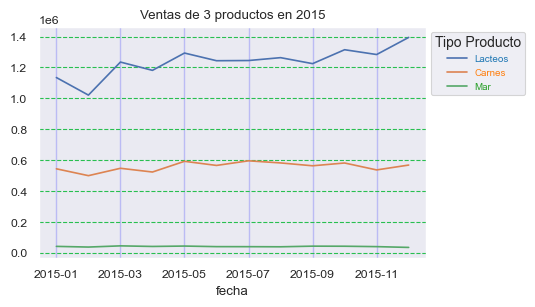

In [ ]:
ax = df.plot.line(
    figsize=(5,3),
    title='Ventas de 3 productos en 2015',
)
ax.xaxis.grid(
    visible=True, # activa o desactiva las lineas verticales si es false el resto se borra
    color='blue', # color de las lineas blue, red, green, etc o en HEX 
    alpha=0.2, # transparencia de las lineas de 0 a 1
    linewidth=1, # grosor de las lineas desde 0
)
ax.yaxis.grid(
    visible=True, # activa o desactiva las lineas horizontales si es false el resto se borra
    color='#28bf50', # color de las lineas
    linestyle='--', # estilo de las lineas: '-', '--', '-.', ':'
)
ax.legend(
    title='Tipo Producto',
    labels=['Lacteos','Carnes','Mar'],
    fontsize=7,
    # colocacion de la leyenda
    loc='upper left', # 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
    bbox_to_anchor=(1, 1), # (x,y) para ajustar la posicion exacta de la leyenda que son porcentajes 
    labelcolor=['#1f77b4', '#ff7f0e', '#2ca02c'], # colores de las etiquetas en HEX
    title_fontproperties={
        'size':10
    },
    alignment='center', # alinea las etiquetas a la izquierda, derecha o centro
    ncol=1 # numero de columnas que tendra la leyenda (1,2,3...
    # si no quieres la leyenda -> ax.legend().set_visible(False)
)

Text(8, 1000000, 'Noviembre OJO!')

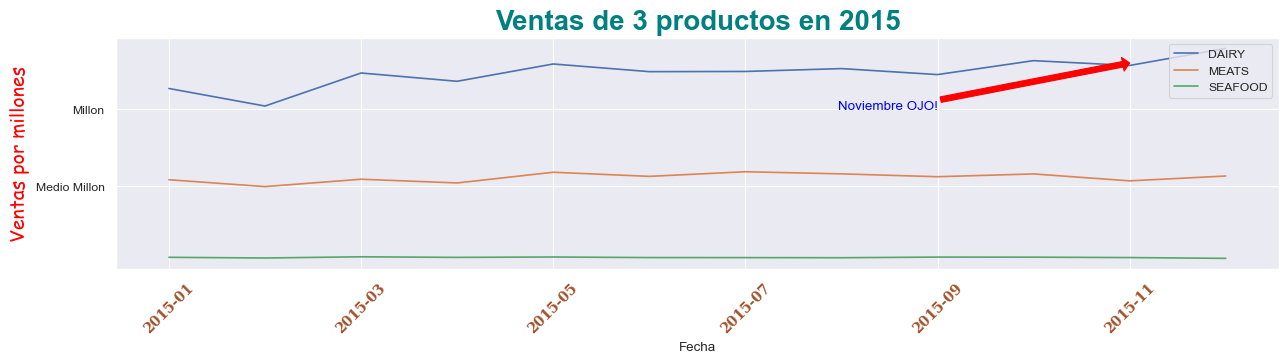

In [113]:
ax = df.plot.line(
    figsize=(15,3),
)
# titulo del grafico
ax.set_title(
    'Ventas de 3 productos en 2015',
    fontdict={
        'fontsize':20,
        'weight':'bold',
        'color':'#008080',
    }
)
# ticks o etiquetas de los niveles de los ejes
ax.set_xticks(
    np.arange(0,len(df),1)[::2] # se pueden dar saltos al colocar [::2] o cambiar el 1 por 2,3,4 etc
)
ax.set_xticklabels(
    df.index.values[::2], # se pueden dar saltos al colocar [::2] o cambiar el 1 por 2,3,4 etc
    rotation=45, # rotacion de las etiquetas
    fontdict={
        'family':'serif',
        'color':'#a0522d',
        'weight':'bold',
        'size':10,
    }
)
ax.set_yticks(
    [500000,1000000],
)
ax.set_yticklabels(
    ['Medio Millon','Millon'],
    rotation=0, # rotacion de las etiquetas
)
# etiqueta del eje
ax.set_xlabel(
    'Fecha',
    loc='center', # 'left', 'center', 'right'

) 
ax.set_ylabel(
    'Ventas por millones',
    loc='center', # 'top', 'center', 'bottom'
    fontdict={
        'name':'Comic Sans MS',
        'color':'red',
        'fontsize':14,
    }
)

ax.annotate(
    'Noviembre OJO!',
    xy=(10,1300000),
    color='blue',
    xytext=(8,1000000),
    horizontalalignment='right',
    arrowprops={
        'color':'red',
        'headwidth':10,
        'headlength':5,
    },
)


Ahora matplotlib saca el objeto de la grafica ahora se pueden hacer detalles mas personalizados sin necesidad de llamar todo sino solamente al objeto.

Los colores en los graficos se pueden definir con HEX.

Text(0.5, 1.0, 'SEAFOOD')

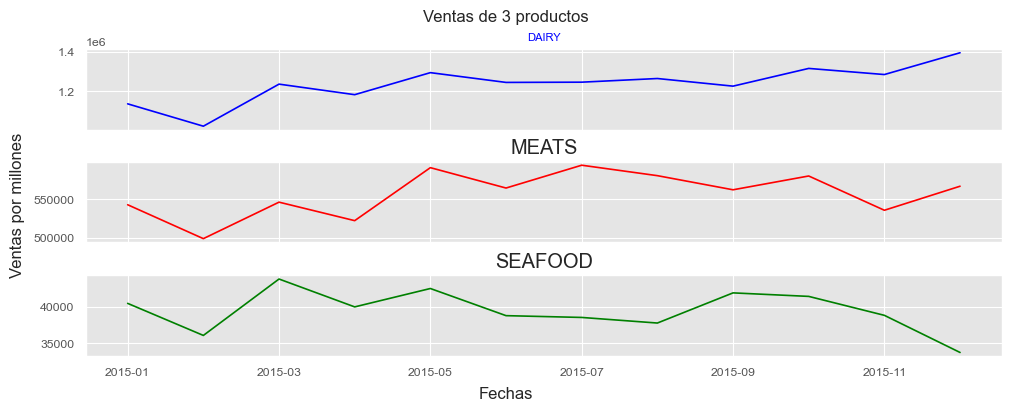

In [193]:
# devuelve el objeto y la lista de graficos ya sea por cada uno
fig,axs =plt.subplots(3,1,constrained_layout=True)   # filas y columnas y acomodador automatico de espacio
fig.suptitle(
    'Ventas de 3 productos'
)
fig.supylabel('Ventas por millones')
fig.supxlabel('Fechas')
fig.set_size_inches(8,6)
plt.style.use('ggplot')
df.plot.line(
    figsize=(10,4),
    y='DAIRY',
    ax=axs[0],  # se asigna el grafico al objeto axs[0], axs[1], axs[2] etc dependiendo de la cantidad de graficos que se hayan creado
    color='blue',
)
df.plot.line(
    figsize=(10,4),
    y='MEATS',
    ax=axs[1],  # se asigna el grafico al objeto axs[0], axs[1], axs[2] etc dependiendo de la cantidad de graficos que se hayan creado
    color='red',
)
df.plot.line(
    figsize=(10,4),
    y='SEAFOOD',
    ax=axs[2],  # se asigna el grafico al objeto axs[0], axs[1], axs[2] etc dependiendo de la cantidad de graficos que se hayan creado
    color='green',
)

axs[0].set_xticklabels([])
axs[1].set_xticklabels([])

axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('')

axs[0].legend().set_visible(False)
axs[1].legend().set_visible(False)
axs[2].legend().set_visible(False)

axs[0].set_title('DAIRY',fontdict={'fontsize':8,'color':'blue'},loc='center')
axs[1].set_title('MEATS')
axs[2].set_title('SEAFOOD')


In [215]:
plt.savefig(
    './images/grafico_matplotlib.png',
    format='png', # PNG, JPG, SVG, PDF
    dpi=1200, # resolucion de la imagen
    bbox_inches='tight' # ajusta los margenes de la imagen al contenido
) # guarda la imagen en el directorio especificado

<Figure size 1500x300 with 0 Axes>

### Grafico Seaborn

In [11]:
import seaborn as sns

Al igual se pueden personalizar las figuras, temas estilos como matplotlib o propiamente [seaborn](https://seaborn.pydata.org/tutorial/aesthetics.html)

Text(11, 1250000, 'Noviembre')

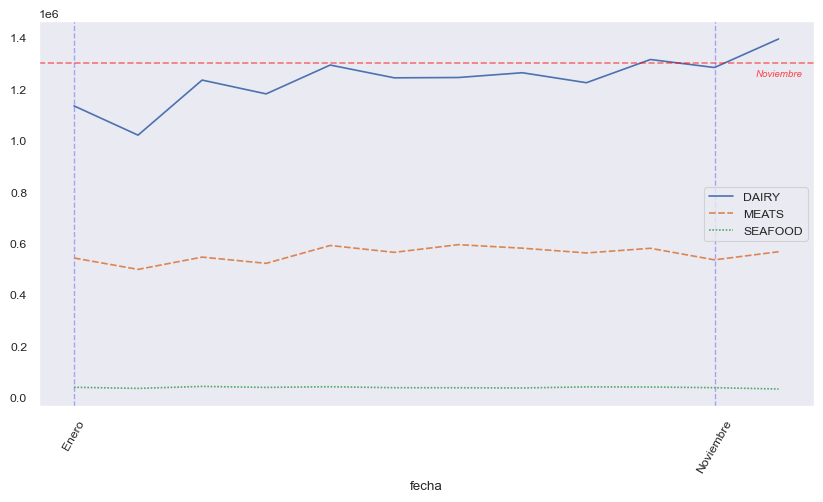

In [ ]:
# metodo global
plt.figure(
    figsize=(10,5)
)
plt.grid(
    visible=True,
    axis='x',
    color='blue',
    alpha=0.3,
    linestyle='--',
    linewidth=1,
)
plt.grid(
    visible=False,
    axis='y',
)
# metodos de seaborn
sns.set_style('dark') # darkgrid, whitegrid, dark, white, ticks)
sns.set_theme('paper') # paper, notebook, talk, poster

ax = sns.lineplot(
    data=df,
)

ax.set_xticks(
    [0,10],
)
ax.set_xticklabels(
    ['Enero','Noviembre'],
    rotation=60,
)
ax.axhline( # igual existe axvline
    y=1300000,
    color='red',
    linestyle='--',
    alpha=0.5,
)
ax.annotate( 
    'Noviembre',
    xy=(11,1250000),
    horizontalalignment='center',
    color='red',
    fontstyle='italic',
    alpha=0.7,
    size=7,
)


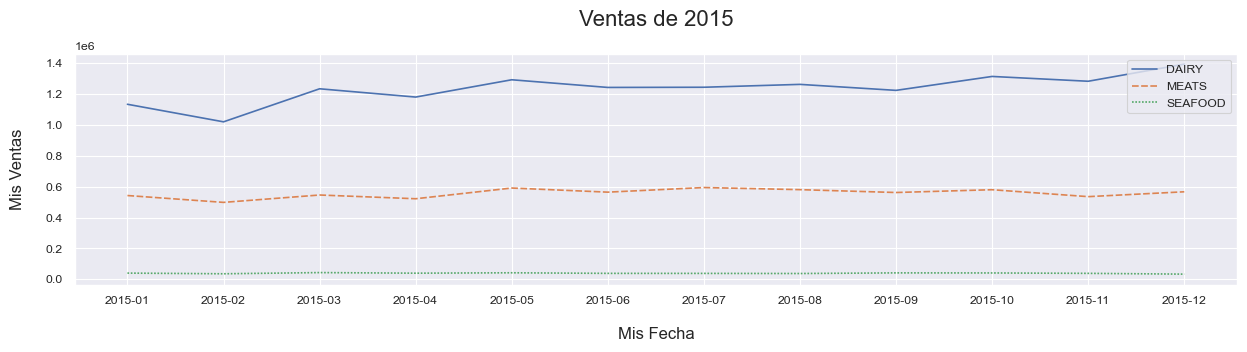

In [ ]:
# metodo global
plt.title(
    'Ventas de 2015',
    fontsize=16,
    loc='center', # 'left', 'center', 'right'
    pad=20, # espacio entre el titulo y la grafica
)
plt.xlabel(
    'Mis Fecha',
    fontsize=12,
    loc='center', # 'left', 'center', 'right'
    labelpad=15, # espacio entre la etiqueta y el eje
)
plt.ylabel(
    'Mis Ventas',
    fontsize=12,
    loc='center', # 'top', 'center', 'bottom'
    labelpad=15, # espacio entre la etiqueta y el eje
)

sns.set_style('dark') # darkgrid, whitegrid, dark, white, ticks)
sns.set_theme('paper') # paper, notebook, talk, poster

ax = sns.lineplot(
    data=df,
)
"""
ax.set(
    title='Ventas de 2015',
    xlabel='Mis Fecha',
    ylabel='Mis Ventas',
)
"""

In [207]:
plt.savefig(
    './images/grafico_seaborn.png',
    format='png',
    dpi=300,
    bbox_inches='tight' # ajusta los margenes de la imagen al contenido
)

<Figure size 1500x300 with 0 Axes>

### Grafico Plotly

In [24]:
import plotly.express as px

Ahi se puede ver los temas de [plotly](https://plotly.com/python/templates/)

In [174]:
fig = px.line(
    df,
    width=800, # ancho de la figura
    height=400, # altura de la figura
    template='plotly_dark' # plotly, plotly_white, plotly_dark, ggplot2, seaborn, simple_white, none
)
fig.update_layout(
    xaxis_title='Periodo', # titulo del eje x
    yaxis_title='Ventas', # titulo del eje y
    font_color='#ff7f0e', # color de la fuente
    font_family='Timers New Roman', # tipo de letra
    legend_font_color='green', # color de la fuente de la leyenda
    legend_title_font_color='red', # color de la fuente del titulo de la leyenda
    title_font_color='blue', # color de la fuente del titulo
    title_font_family='Comic Sans MS', # tipo de letra del titulo
    # leyenda
    legend_title_text='Tipo Producto',
    legend={
        'y':0.5,
        'x':1.05,
        'font':{
            'family':'Arial',
            'size':10,
            'color':'green',
        },
        'bgcolor':'lightgrey',
        'bordercolor':'black',
        'borderwidth':2,
    }
)
fig.update_xaxes(
    showgrid= False,
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='white',
    griddash='solid', # 'solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot'
    minor_griddash='dot', # 'solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot'
    
)
fig.show()

In [149]:
fig = px.line(
    df,
    width=800, # ancho de la figura
    height=400, # altura de la figura
    template='plotly_dark' # plotly, plotly_white, plotly_dark, ggplot2, seaborn, simple_white, none
)
fig.add_annotation(
    x='2015-03',
    y='1250000',
    text='Noviembre',
    opacity=0.8,
    font={
        'size':12,
        'color':'white',
    },
    showarrow=True,
    arrowsize=1,
    arrowwidth=2,
    arrowhead=3, # 0 al 8
)
fig.add_hline(
    y=1250000,
    annotation_text='Linea Top',
    annotation_position='top right', # 'top left', 'top right', 'bottom left', 'bottom right'
    annotation_font_color='violet',
    annotation_font_size=12,
    line_dash='dot', # 'solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot'
    opacity=0.8,
    line_width=4,
    line_color='red'
)
fig.show()

In [98]:
fig = px.line(
    df,
    width=800, # ancho de la figura
    height=400, # altura de la figura
    template='ggplot2', # plotly, plotly_white, plotly_dark, ggplot2, seaborn, simple_white, none
    title='Ventas de 2015',
    labels={'fecha':'periodo','value':'ventas','variable':'productos'}
)
"""
fig.update_layout(
    xaxis_title='Mi Periodo',
    yaxis_title='Mis Ventas',
)
"""
fig.update_xaxes(
    tickangle=45,
    tickvals=df.index.values, # se pueden dar saltos al colocar [::2] o cambiar el 1 por 2,3,4 etc
    tickmode='array',
    title_font_family='Arial',
    title_font_color='green',
    title_font_size=18,
    tickfont={
        'family':'Arial',
        'color':'#ff7f0e',
        'size':10,
    }
)
fig.update_yaxes(
    nticks=20, # numero de niveles del eje equidistantes
    # tickvals=[500000,1000000],
    # dticks=500000, # distancia entre niveles del eje
    # tickformat=',.0f', # formato de los numeros del eje
)
fig.show()

In [195]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [200]:
fig = make_subplots(
    rows=3,
    cols=1
)
fig.append_trace(
    go.Scatter(
        x=df.index.values,
        y=df['DAIRY'],
        name='Lacteos',
    ),
    row=1,
    col=1
)
fig.append_trace(
    go.Scatter(
        x=df.index.values,
        y=df['MEATS'],
        name='Carnes',
    ),
    row=2,
    col=1
)
fig.append_trace(
    go.Scatter(
        x=df.index.values,
        y=df['SEAFOOD'],
        name='Mariscos',
    ),
    row=3,
    col=1
)

fig.update_layout(
    height=600,
    width=700,
    title_text='Ventas de Productos'
)

fig.show()